# 9-1 순차 데이터와 순환 신경망

## 순차 데이터

## 순환 신경망

# 9-2 순환 신경망으로 IMDB 리뷰 분류하기

In [2]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)


17464789/17464789 [==============================] - 8s 0us/step


In [3]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [4]:
print(len(train_input[0]))

218


In [5]:
print(len(train_input[1]))

189


In [8]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [9]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [10]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [11]:
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [12]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


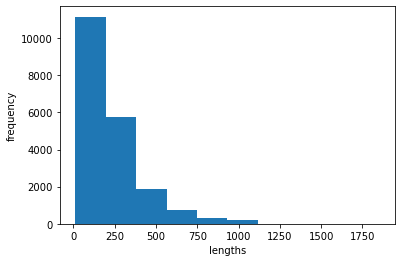

In [13]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('lengths')
plt.ylabel('frequency')
plt.show()

In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)

In [17]:
print(train_seq.shape)

(20000, 100)


In [18]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [19]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [20]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [21]:
val_seq = pad_sequences(val_input, maxlen=100)

## 순환 신경망 만들기

In [22]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

2022-06-05 13:55:19.669847: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
train_oh = keras.utils.to_categorical(train_seq)

In [24]:
print(train_oh.shape)

(20000, 100, 500)


In [25]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [26]:
print(np.sum(train_oh[0][0]))

1.0


In [27]:
val_oh = keras.utils.to_categorical(val_seq)

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


## 순환 신경망 훈련하기

In [29]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-modell.h5',\
    save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,\
    restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target),\
    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 7s 20ms/step - loss: 0.6977 - accuracy: 0.5054 - val_loss: 0.6952 - val_accuracy: 0.5102
Epoch 2/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6936 - accuracy: 0.5142 - val_loss: 0.6928 - val_accuracy: 0.5202
Epoch 3/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6913 - accuracy: 0.5267 - val_loss: 0.6914 - val_accuracy: 0.5274
Epoch 4/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6893 - accuracy: 0.5358 - val_loss: 0.6899 - val_accuracy: 0.5328
Epoch 5/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6874 - accuracy: 0.5446 - val_loss: 0.6884 - val_accuracy: 0.5406
Epoch 6/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6854 - accuracy: 0.5551 - val_loss: 0.6869 - val_accuracy: 0.5476
Epoch 7/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6829 - accuracy: 0.5638 - val_loss: 0.6845 - val_accuracy:

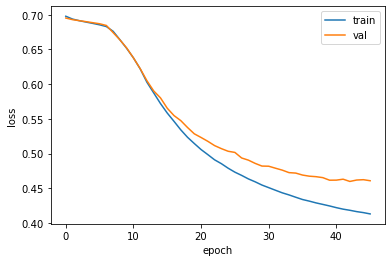

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [31]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 4000000000


## 단어 임베딩을 사용하기

In [32]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [33]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [36]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5',\
    save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,\
    validation_data=(val_seq, val_target),
    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 14ms/step - loss: 0.6950 - accuracy: 0.4954 - val_loss: 0.6927 - val_accuracy: 0.5140
Epoch 2/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6914 - accuracy: 0.5280 - val_loss: 0.6910 - val_accuracy: 0.5324
Epoch 3/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6884 - accuracy: 0.5477 - val_loss: 0.6896 - val_accuracy: 0.5394
Epoch 4/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6852 - accuracy: 0.5616 - val_loss: 0.6886 - val_accuracy: 0.5386
Epoch 5/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6817 - accuracy: 0.5708 - val_loss: 0.6879 - val_accuracy: 0.5450
Epoch 6/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6775 - accuracy: 0.5809 - val_loss: 0.6848 - val_accuracy: 0.5464
Epoch 7/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6638 - accuracy: 0.6345 - val_loss: 0.6634 - val_accuracy:

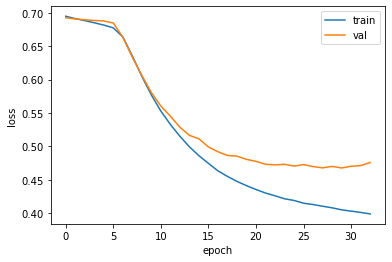

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 9-3 LSTM과 GRU 셀

## LSTM 신경망 훈련하기

In [39]:
from tensorflow.keras.datasets import imdb 
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500
)
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [41]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [42]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [44]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',\
    metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64,\
    validation_data=(val_seq, val_target),
    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 22ms/step - loss: 0.6928 - accuracy: 0.5243 - val_loss: 0.6921 - val_accuracy: 0.5642
Epoch 2/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6909 - accuracy: 0.6105 - val_loss: 0.6894 - val_accuracy: 0.6418
Epoch 3/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6858 - accuracy: 0.6525 - val_loss: 0.6811 - val_accuracy: 0.6732
Epoch 4/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6656 - accuracy: 0.6923 - val_loss: 0.6380 - val_accuracy: 0.7234
Epoch 5/100
313/313 [==============================] - 7s 22ms/step - loss: 0.5872 - accuracy: 0.7249 - val_loss: 0.5662 - val_accuracy: 0.7306
Epoch 6/100
313/313 [==============================] - 7s 22ms/step - loss: 0.5505 - accuracy: 0.7396 - val_loss: 0.5426 - val_accuracy: 0.7508
Epoch 7/100
313/313 [==============================] - 7s 22ms/step - loss: 0.5273 - accuracy: 0.7550 - val_loss: 0.5226 - val_accuracy:

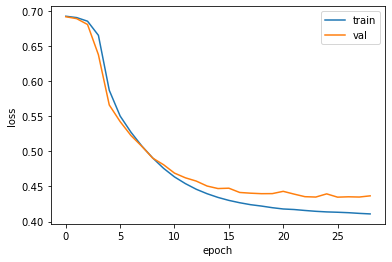

In [45]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 순환층에 드롭아웃 적용하기

In [46]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [47]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',\
    metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,\
    validation_data=(val_seq, val_target),
    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 23ms/step - loss: 0.6926 - accuracy: 0.5317 - val_loss: 0.6921 - val_accuracy: 0.5622
Epoch 2/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6912 - accuracy: 0.5794 - val_loss: 0.6902 - val_accuracy: 0.5962
Epoch 3/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6881 - accuracy: 0.6117 - val_loss: 0.6860 - val_accuracy: 0.6262
Epoch 4/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6798 - accuracy: 0.6368 - val_loss: 0.6733 - val_accuracy: 0.6268
Epoch 5/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6453 - accuracy: 0.6360 - val_loss: 0.6216 - val_accuracy: 0.6922
Epoch 6/100
313/313 [==============================] - 7s 24ms/step - loss: 0.6001 - accuracy: 0.7171 - val_loss: 0.5923 - val_accuracy: 0.7336
Epoch 7/100
313/313 [==============================] - 7s 23ms/step - loss: 0.5763 - accuracy: 0.7405 - val_loss: 0.5701 - val_accuracy:

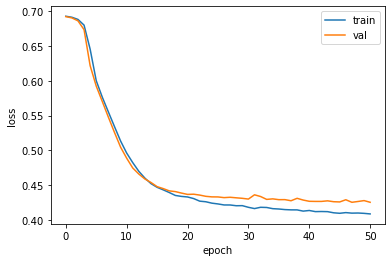

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 2개의 층을 연결하기

In [49]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [50]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [51]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',\
    metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,\
    validation_data=(val_seq, val_target),
    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 17s 44ms/step - loss: 0.6928 - accuracy: 0.5257 - val_loss: 0.6923 - val_accuracy: 0.5386
Epoch 2/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6898 - accuracy: 0.6010 - val_loss: 0.6854 - val_accuracy: 0.6414
Epoch 3/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6636 - accuracy: 0.6525 - val_loss: 0.6207 - val_accuracy: 0.7096
Epoch 4/100
313/313 [==============================] - 13s 43ms/step - loss: 0.5890 - accuracy: 0.7178 - val_loss: 0.5628 - val_accuracy: 0.7226
Epoch 5/100
313/313 [==============================] - 16s 50ms/step - loss: 0.5534 - accuracy: 0.7304 - val_loss: 0.5394 - val_accuracy: 0.7358
Epoch 6/100
313/313 [==============================] - 14s 45ms/step - loss: 0.5289 - accuracy: 0.7509 - val_loss: 0.5164 - val_accuracy: 0.7562
Epoch 7/100
313/313 [==============================] - 14s 44ms/step - loss: 0.5133 - accuracy: 0.7596 - val_loss: 0.5053 - val_ac

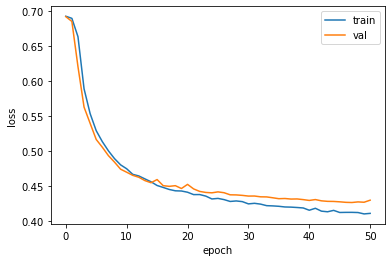

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## GRU 구조 / GRU 신경망 훈련

In [53]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [54]:
model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [55]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy',\
    metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,\
    validation_data=(val_seq, val_target),
    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 10s 27ms/step - loss: 0.6925 - accuracy: 0.5314 - val_loss: 0.6920 - val_accuracy: 0.5412
Epoch 2/100
313/313 [==============================] - 8s 24ms/step - loss: 0.6908 - accuracy: 0.5681 - val_loss: 0.6900 - val_accuracy: 0.5696
Epoch 3/100
313/313 [==============================] - 8s 24ms/step - loss: 0.6877 - accuracy: 0.5907 - val_loss: 0.6860 - val_accuracy: 0.6034
Epoch 4/100
313/313 [==============================] - 9s 28ms/step - loss: 0.6820 - accuracy: 0.6255 - val_loss: 0.6788 - val_accuracy: 0.6204
Epoch 5/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6714 - accuracy: 0.6395 - val_loss: 0.6654 - val_accuracy: 0.6408
Epoch 6/100
313/313 [==============================] - 9s 28ms/step - loss: 0.6508 - accuracy: 0.6637 - val_loss: 0.6374 - val_accuracy: 0.6662
Epoch 7/100
313/313 [==============================] - 9s 28ms/step - loss: 0.6055 - accuracy: 0.6970 - val_loss: 0.5694 - val_accurac

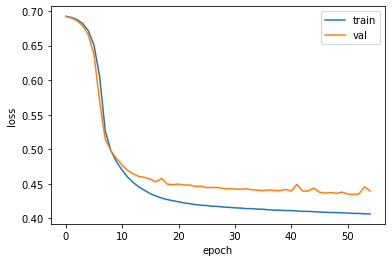

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [57]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 7s 8ms/step - loss: 0.4205 - accuracy: 0.8046


[0.4205223023891449, 0.8045600056648254]